<a href="https://colab.research.google.com/github/LukegCashman/Cashman_ECGR3090/blob/main/LC_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# SECTION 0: File set-up and confirmation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import math

In [105]:
# Pull the csv file for Diabetes from github
urlD = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv'

# Read the data from Diabetes set
diabetes_input = pd.read_csv(urlD)
diabetes_input.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
# randomize the training and validation data split for Diabetes set
np.random.seed(0)
diabetes_train, diabetes_validate = train_test_split(diabetes_input, train_size = 0.8, test_size = 0.2, random_state = 100)

In [107]:
# Standardize Diabetes training and validation sets
object = StandardScaler()
sd_train = object.fit_transform(diabetes_train)
sd_validate = object.fit_transform(diabetes_validate)

In [108]:
# Count number of samples in each Diabetes set
SizeD = len(diabetes_input)
TrainSizeD = len(sd_train)
ValidSizeD = len(sd_validate)
print(SizeD)
print(TrainSizeD)
print(ValidSizeD)

768
614
154


In [109]:
# Import Cancer data set
from sklearn.datasets import load_breast_cancer

# Read the data from Cancer set
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_data.shape
cancer_input = pd.DataFrame(cancer_data)
cancer_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [110]:
cancer_labels = cancer.target
labels = np.reshape(cancer_labels,(569,1))
final_cancer_data = np.concatenate([cancer_input,labels],axis=1)

In [111]:
# randomize the training and validation data split for Cancer set
np.random.seed(0)
cancer_train, cancer_validate = train_test_split(final_cancer_data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [112]:
# Standardize Cancer training and validation sets
sc_train = object.fit_transform(cancer_train)
sc_validate = object.fit_transform(cancer_validate)

In [113]:
# Count number of samples in each Cancer set
SizeC = len(cancer_input)
TrainSizeC = len(sc_train)
ValidSizeC = len(sc_validate)
print(SizeC)
print(TrainSizeC)
print(ValidSizeC)

569
455
114


In [114]:
# SECTION 1: Problem 1

# Seperate X and Y variables from Diabetes training and validation sets
X0T = np.ones((TrainSizeD, 1))
X0V = np.ones((ValidSizeD, 1))

XT1 = sd_train[:,0:7]
XV1 = sd_validate[:,0:7]

X_train1 = np.hstack((X0T, XT1))
X_valid1 = np.hstack((X0V, XV1))

Y_train1 = diabetes_train.iloc[:, 8].values
Y_valid1 = diabetes_validate.iloc[:, 8].values

In [115]:
# Initialize Theta, Alpha, and number of iterations
Theta1 = np.zeros(8)
Iterations = 2000
Alpha = 0.01

In [116]:
# Create function for calculating cost and accuracy
def comp_log_cost0(X, V, Yx, Yv, theta):
    # Compute training cost and accuracy
    zT = theta.dot(X.transpose())
    gT = 1/(1+np.exp(-zT))
    ones = np.ones(TrainSizeD)
    C = -Yx.dot(np.log(gT)) - (ones-Yx).dot(np.log(ones-gT));

    errorCountT = np.zeros(TrainSizeD);
    for a in range(TrainSizeD):
        if gT[a] > 0.5:
            if Y_train1[a] > 0.5:
                errorCountT[a] = 0
            else:
                errorCountT[a] = 1
        else:
            if Y_train1[a] > 0.5:
                errorCountT[a] = 1
            else:
                errorCountT[a] = 0
    errorRateT = sum(errorCountT)/TrainSizeD
    aT = 1 - errorRateT

    # Compute validation cost and accuracy
    zTV = theta.dot(V.transpose())
    gTV = 1/(1+np.exp(-zTV))
    onesV = np.ones(ValidSizeD)
    D = -Yv.dot(np.log(gTV)) - (onesV-Yv).dot(np.log(onesV-gTV));

    errorCountV = np.zeros(ValidSizeD);
    for a in range(ValidSizeD):
        if gTV[a] > 0.5:
            if Y_valid1[a] > 0.5:
                errorCountV[a] = 0
            else:
                errorCountV[a] = 1
        else:
            if Y_valid1[a] > 0.5:
                errorCountV[a] = 1
            else:
                errorCountV[a] = 0
    errorRateV = sum(errorCountV)/ValidSizeD
    aV = 1 - errorRateV
    return C, D, aT, aV

In [117]:
# Create gradient decent function for logistic model
def grad_descent_log0(X, V, Yx, Yv, theta, alpha, iterations):
    #Create array to store error for each iteration
    m = len(Yx)
    cost_historyT = np.zeros(iterations)
    cost_historyV = np.zeros(iterations)
    accuracy_historyT = np.zeros(iterations)
    accuracy_historyV = np.zeros(iterations)
    hTheta = np.zeros(TrainSizeD)

    # repeat gradient decent 2000 times
    for i in range(iterations):
        zTheta = theta.dot(X.transpose())
        gTheta = 1/(1+np.exp(-zTheta))
        errors = np.subtract(gTheta, Yx)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_historyT[i], cost_historyV[i], accuracy_historyT[i], accuracy_historyV[i] = comp_log_cost0(X, V, Yx, Yv, theta)

    return theta, cost_historyT, cost_historyV, accuracy_historyT, accuracy_historyV

In [118]:
# Find optimal Theta values for Diabetes set
Theta1, cost_historyT1, cost_historyV1, accuracy_historyT1, accuracy_historyV1 = grad_descent_log0(X_train1, X_valid1, Y_train1, Y_valid1, Theta1, Alpha, Iterations)
print('Final value of theta =', Theta1)
print('Training Cost =', cost_historyT1)
print('Validation Cost =', cost_historyV1)
print('Training Accuracy =', accuracy_historyT1)
print('Validation Accuracy =', accuracy_historyV1)

Final value of theta = [-0.78876032  0.41983577  1.07308269 -0.10459347 -0.07796318 -0.03518004
  0.63136361  0.39300158]
Training Cost = [424.83619296 424.08562858 423.34062861 ... 282.29547538 282.29313177
 282.29079219]
Validation Cost = [106.5878999  106.43243332 106.27825435 ...  83.75286621  83.75345889
  83.75405144]
Training Accuracy = [0.78664495 0.78664495 0.78664495 ... 0.78990228 0.78990228 0.78990228]
Validation Accuracy = [0.7012987  0.7012987  0.7012987  ... 0.72727273 0.72727273 0.72727273]


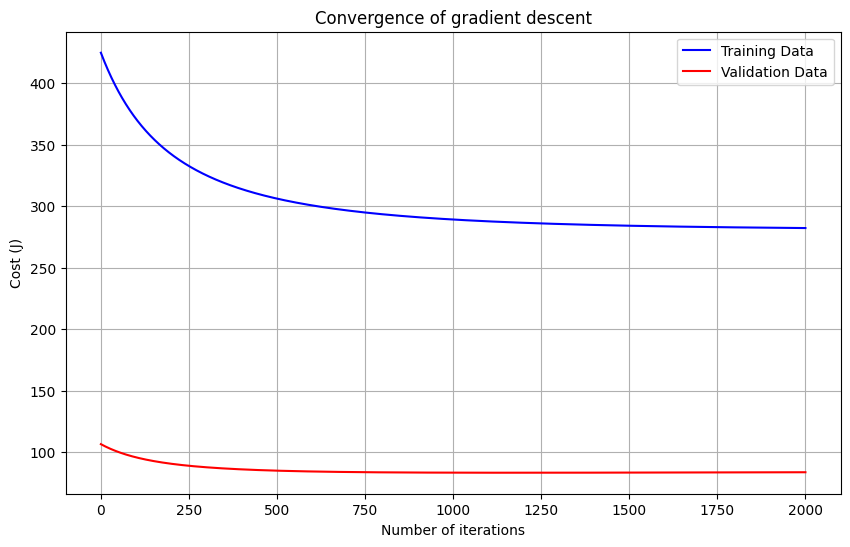

In [119]:
# Plot cost at each iteration for Diabetes set
plt.plot(range(1, Iterations + 1), cost_historyT1, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), cost_historyV1, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()

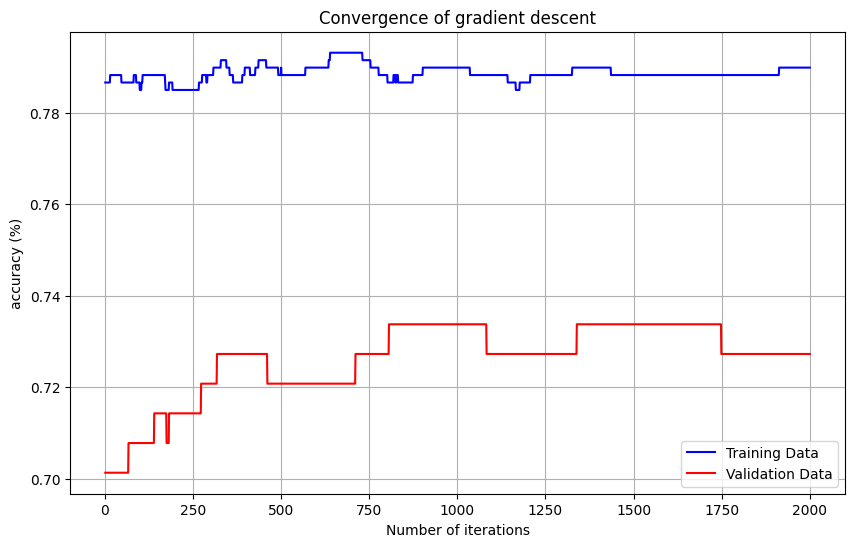

In [120]:
# Plot accuracy at each iteration for Diabetes set
plt.plot(range(1, Iterations + 1), accuracy_historyT1, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), accuracy_historyV1, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('accuracy (%)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()

In [121]:
# Assign each predicted variable as a 1 or a 0 for training and validation sets
pT0 = X_train1.dot(Theta1)
pT1 = np.zeros(TrainSizeD);
pV0 = X_valid1.dot(Theta1)
pV1 = np.zeros(ValidSizeD);

# Confusion matrix for training set
for a in range(TrainSizeD):
    if pT0[a] > 0.5:
       pT1[a] = 1
    else:
      pT1[a] = 0
cnf_matrixT1 = confusion_matrix(pT1, Y_train1)

# Confusion matrix for validation set
for a in range(ValidSizeD):
    if pV0[a] > 0.5:
       pV1[a] = 1
    else:
      pV1[a] = 0
cnf_matrixV1 = confusion_matrix(pV1, Y_valid1)

In [122]:
# Seperate true positives, true negatives, false positives, and false negatives
tpT1 = cnf_matrixT1[1,1]
tnT1 = cnf_matrixT1[0,0]
fpT1 = cnf_matrixT1[0,1]
fnT1 = cnf_matrixT1[1,0]

tpV1 = cnf_matrixV1[1,1]
tnV1 = cnf_matrixV1[0,0]
fpV1 = cnf_matrixV1[0,1]
fnV1 = cnf_matrixV1[1,0]

In [123]:
# Calculate recal, precision and F1 score for training set
recalT1 = tpT1/(tpT1+fnT1)
precisionT1 = tpT1/(tpT1+fpT1)
f1scoreT1 = (2*recalT1*precisionT1)/(recalT1+precisionT1)

print('Final Training Accuracy =', accuracy_historyT1[1999])
print('Final Training Recal =', recalT1)
print('Final Training Precision =', precisionT1)
print('Final Traing F1 Score =', f1scoreT1)

Final Training Accuracy = 0.7899022801302932
Final Training Recal = 0.8333333333333334
Final Training Precision = 0.4883720930232558
Final Traing F1 Score = 0.6158357771260996


In [124]:
# Calculate recal, precision and F1 score for validation set
recalV1 = tpV1/(tpV1+fnV1)
precisionV1 = tpV1/(tpV1+fpV1)
f1scoreV1 = (2*recalV1*precisionV1)/(recalV1+precisionV1)

print('Final Validation Accuracy =', accuracy_historyV1[1999])
print('Final Validation Recal =', recalV1)
print('Final Validation Precision =', precisionV1)
print('Final Validation F1 Score =', f1scoreV1)

Final Validation Accuracy = 0.7272727272727273
Final Validation Recal = 0.6875
Final Validation Precision = 0.41509433962264153
Final Validation F1 Score = 0.5176470588235295


Text(0.5, 533.5555555555555, 'Predicted label')

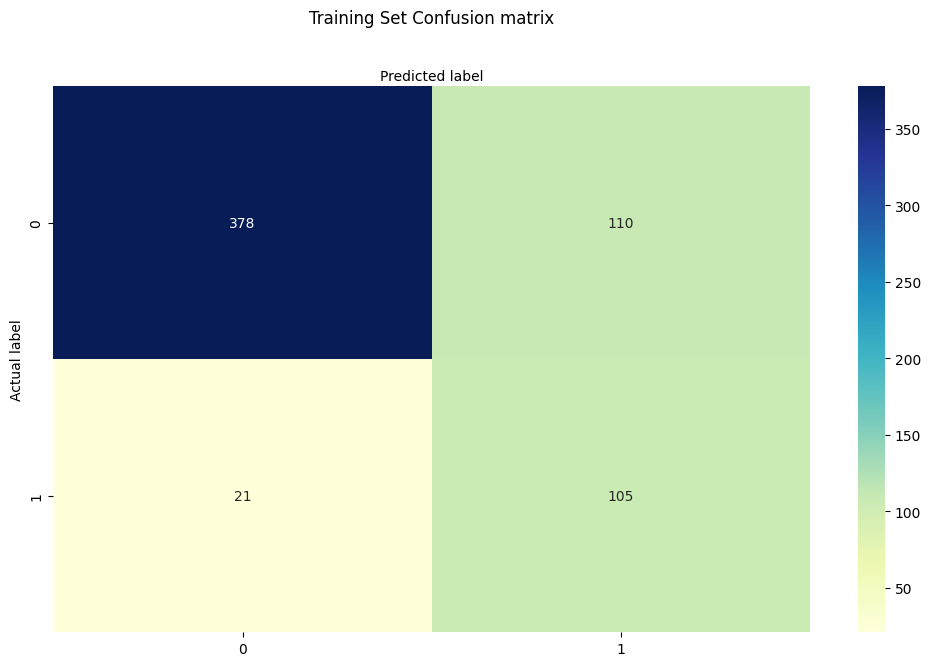

In [125]:
# Display confusion matrix for training set
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixT1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Training Set Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 533.5555555555555, 'Predicted label')

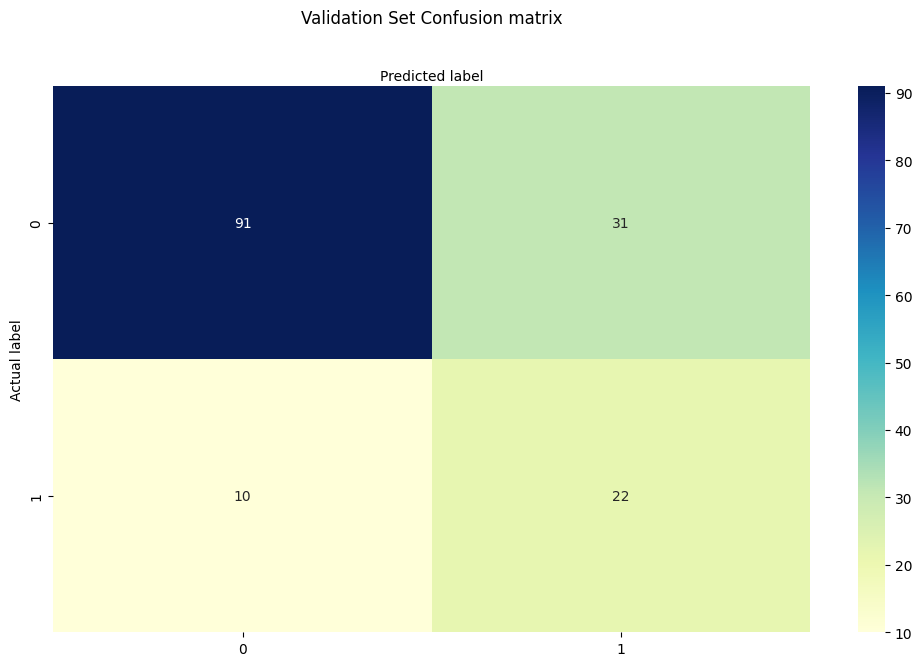

In [126]:
# Display confusion matrix for validation set
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixV1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Validation Set Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [127]:
# SECTION 2: Problem 2.a

# Seperate X and Y variables from Cancer training and validation sets
X0T2 = np.ones((TrainSizeC, 1))
X0V2 = np.ones((ValidSizeC, 1))

XT2a = sc_train[:,0:29]
XV2a = sc_validate[:,0:29]

X_train2a = np.hstack((X0T2, XT2a))
X_valid2a = np.hstack((X0V2, XV2a))

Y_train2 = cancer_train[:,30]
Y_valid2 = cancer_validate[:,30]

In [128]:
# Create function for calculating cost and accuracy
def comp_log_cost(X, V, Yx, Yv, theta):
    # Compute training cost and accuracy
    zT = theta.dot(X.transpose())
    gT = 1/(1+np.exp(-zT))
    ones = np.ones(TrainSizeC)
    C = -Yx.dot(np.log(gT)) - (ones-Yx).dot(np.log(ones-gT));

    errorCountT = np.zeros(TrainSizeC);
    for a in range(TrainSizeC):
        if gT[a] > 0.5:
            if Y_train2[a] > 0.5:
                errorCountT[a] = 0
            else:
                errorCountT[a] = 1
        else:
            if Y_train2[a] > 0.5:
                errorCountT[a] = 1
            else:
                errorCountT[a] = 0
    errorRateT = sum(errorCountT)/TrainSizeC
    aT = 1 - errorRateT

    # Compute validation cost and accuracy
    zTV = theta.dot(V.transpose())
    gTV = 1/(1+np.exp(-zTV))
    onesV = np.ones(ValidSizeC)
    D = -Yv.dot(np.log(gTV)) - (onesV-Yv).dot(np.log(onesV-gTV));

    errorCountV = np.zeros(ValidSizeC);
    for a in range(ValidSizeC):
        if gTV[a] > 0.5:
            if Y_valid2[a] > 0.5:
                errorCountV[a] = 0
            else:
                errorCountV[a] = 1
        else:
            if Y_valid2[a] > 0.5:
                errorCountV[a] = 1
            else:
                errorCountV[a] = 0
    errorRateV = sum(errorCountV)/ValidSizeC
    aV = 1 - errorRateV
    return C, D, aT, aV

In [129]:
# Create gradient decent function for logistic model
def grad_descent_log(X, V, Yx, Yv, theta, alpha, iterations):
    #Create array to store error for each iteration
    m = len(Yx)
    cost_historyT = np.zeros(iterations)
    cost_historyV = np.zeros(iterations)
    accuracy_historyT = np.zeros(iterations)
    accuracy_historyV = np.zeros(iterations)
    hTheta = np.zeros(TrainSizeC)

    # repeat gradient decent 2000 times
    for i in range(iterations):
        zTheta = theta.dot(X.transpose())
        gTheta = 1/(1+np.exp(-zTheta))
        errors = np.subtract(gTheta, Yx)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_historyT[i], cost_historyV[i], accuracy_historyT[i], accuracy_historyV[i] = comp_log_cost(X, V, Yx, Yv, theta)

    return theta, cost_historyT, cost_historyV, accuracy_historyT, accuracy_historyV

In [130]:
# Initialize Theta, Alpha, and number of iterations
Theta2a = np.zeros(30)
Iterations = 2000
Alpha = 0.01

In [131]:
# Find optimal Theta values for problem 1.a
Theta2a, cost_historyT2a, cost_historyV2a, accuracy_historyT2a, accuracy_historyV2a = grad_descent_log(X_train2a, X_valid2a, Y_train2, Y_valid2, Theta2a, Alpha, Iterations)
print('Final value of theta =', Theta2a)
print('Training Cost =', cost_historyT2a)
print('Validation Cost =', cost_historyV2a)
print('Training Accuracy =', accuracy_historyT2a)
print('Validation Accuracy =', accuracy_historyV2a)

Final value of theta = [ 0.55196333 -0.40432858 -0.43668196 -0.39921609 -0.42545006 -0.19243701
 -0.08958332 -0.37679774 -0.47652326 -0.13852389  0.2147524  -0.47963604
 -0.08234971 -0.40033619 -0.44091873 -0.07388811  0.19219736  0.09691954
 -0.08321399  0.09463793  0.23542694 -0.52827271 -0.55885183 -0.51073873
 -0.52678897 -0.46445643 -0.20556993 -0.36108738 -0.50769271 -0.36682815]
Training Cost = [306.6587166  298.46571842 290.7675379  ...  37.29254832  37.28719614
  37.28184813]
Validation Cost = [76.74006832 74.60237598 72.59613484 ... 14.32542027 14.32542046
 14.32542097]
Training Accuracy = [0.93406593 0.93406593 0.93406593 ... 0.98681319 0.98681319 0.98681319]
Validation Accuracy = [0.92982456 0.92982456 0.92982456 ... 0.95614035 0.95614035 0.95614035]


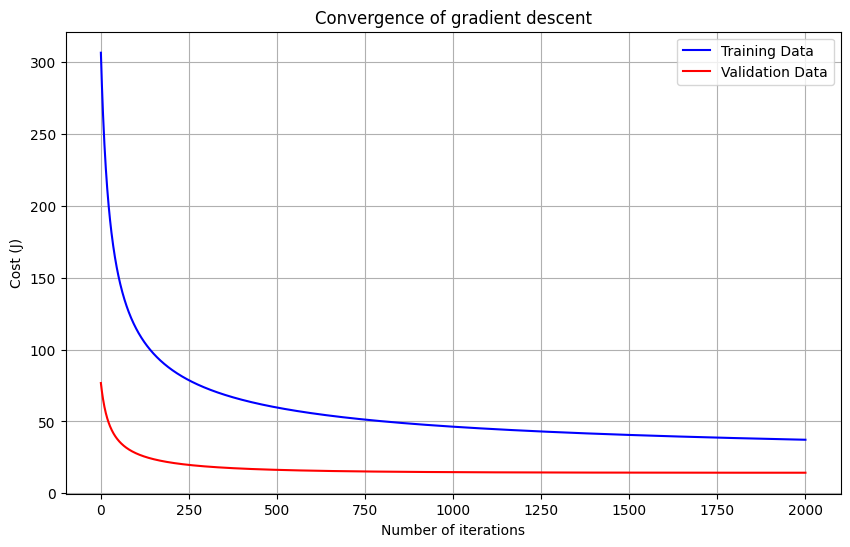

In [132]:
# Plot cost at each iteration for Cancer set
plt.plot(range(1, Iterations + 1), cost_historyT2a, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), cost_historyV2a, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()

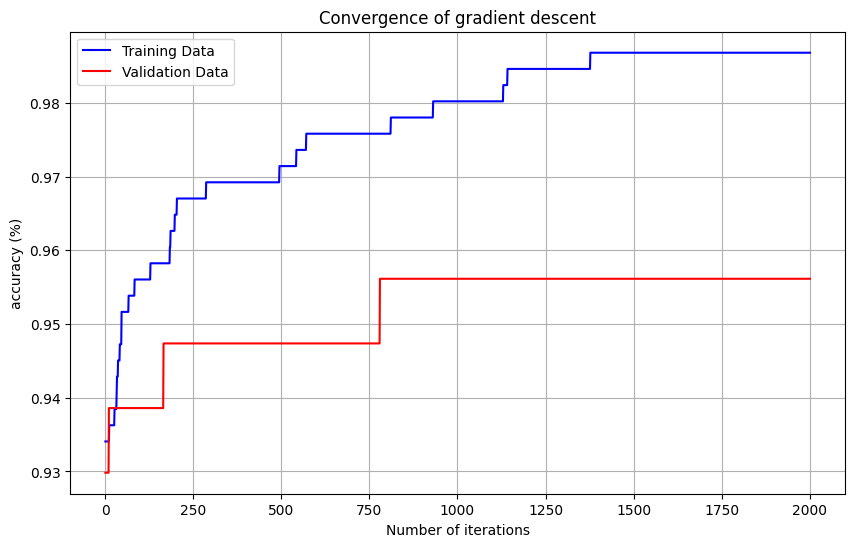

In [133]:
# Plot accuracy at each iteration for Cancer set
plt.plot(range(1, Iterations + 1), accuracy_historyT2a, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), accuracy_historyV2a, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('accuracy (%)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()

In [134]:
# Assign each predicted variable as a 1 or a 0 for the validation set
pV02a = 1/(1+np.exp(-Theta2a.dot(X_valid2a.transpose())))
pV12a = np.zeros(ValidSizeC);

# Confusion matrix for validation set
for a in range(ValidSizeC):
    if pV02a[a] > 0.5:
       pV12a[a] = 1
    else:
      pV12a[a] = 0
cnf_matrixV2a = confusion_matrix(pV12a, Y_valid2)
cnf_matrixV2a

array([[44,  0],
       [ 5, 65]])

In [135]:
# Seperate true positives, true negatives, false positives, and false negatives
tpV2a = cnf_matrixV2a[1,1]
tnV2a = cnf_matrixV2a[0,0]
fpV2a = cnf_matrixV2a[0,1]
fnV2a = cnf_matrixV2a[1,0]

In [136]:
# Calculate recal, precision and F1 score for validation set
recalV2a = tpV2a/(tpV2a+fnV2a)
precisionV2a = tpV2a/(tpV2a+fpV2a)
f1scoreV2a = (2*recalV2a*precisionV2a)/(recalV2a+precisionV2a)

print('Final Validation Accuracy =', accuracy_historyV2a[1999])
print('Final Validation Recal =', recalV2a)
print('Final Validation Precision =', precisionV2a)
print('Final Validation F1 Score =', f1scoreV2a)

Final Validation Accuracy = 0.956140350877193
Final Validation Recal = 0.9285714285714286
Final Validation Precision = 1.0
Final Validation F1 Score = 0.962962962962963


Text(0.5, 533.5555555555555, 'Predicted label')

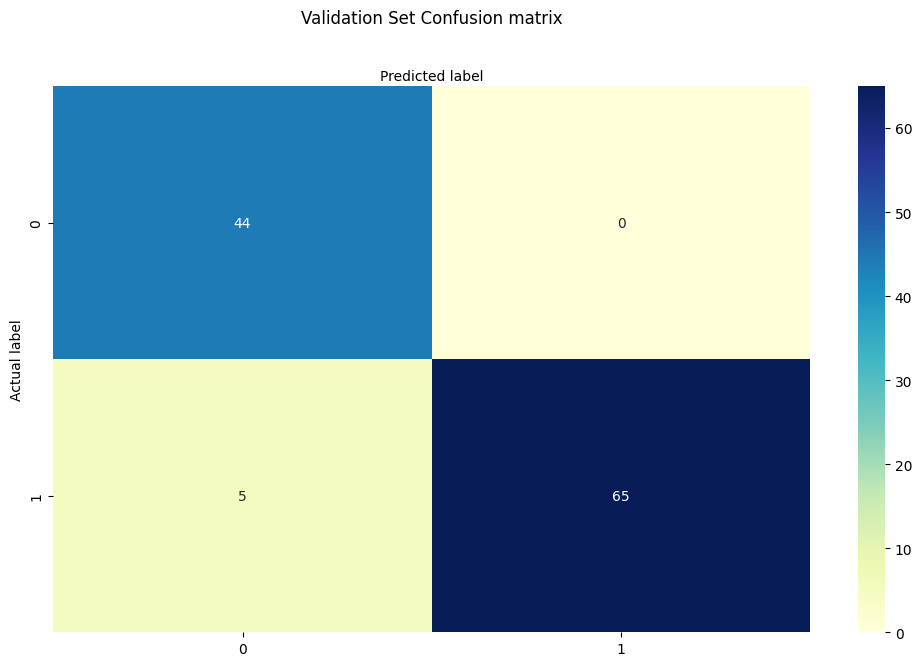

In [137]:
# Display confusion matrix for validation set
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixV2a), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Validation Set Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [138]:
# SECTION 3: Problem 2.b

# Create gradient decent function for logistic model with weighted value
def weight_grad_descent_log(X, V, Yx, Yv, theta, alpha, lamda, iterations):
    #Create array to store error for each iteration
    m = len(Yx)
    cost_historyT = np.zeros(iterations)
    cost_historyV = np.zeros(iterations)
    accuracy_historyT = np.zeros(iterations)
    accuracy_historyV = np.zeros(iterations)
    hTheta = np.zeros(TrainSizeC)

    # repeat gradient decent 2000 times
    for i in range(iterations):
        zTheta = theta.dot(X.transpose())
        gTheta = 1/(1+np.exp(-zTheta))
        errors = np.subtract(gTheta, Yx)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta*(1-alpha*lamda/m) - sum_delta
        cost_historyT[i], cost_historyV[i], accuracy_historyT[i], accuracy_historyV[i] = comp_log_cost(X, V, Yx, Yv, theta)

    return theta, cost_historyT, cost_historyV, accuracy_historyT, accuracy_historyV

In [139]:
# Initialize Theta, Alpha, Lambda and number of iterations
Theta2a = np.zeros(30)
Iterations = 2000
Alpha = 0.01
Lamda = 10

In [140]:
# Find optimal Theta values for problem 1.b
Theta2b, cost_historyT2b, cost_historyV2b, accuracy_historyT2b, accuracy_historyV2b = weight_grad_descent_log(X_train2a, X_valid2a, Y_train2, Y_valid2, Theta2a, Alpha, Lamda, Iterations)
print('Final value of theta =', Theta2b)
print('Training Cost =', cost_historyT2b)
print('Validation Cost =', cost_historyV2b)
print('Training Accuracy =', accuracy_historyT2b)
print('Validation Accuracy =', accuracy_historyV2b)

Final value of theta = [ 0.46989979 -0.34035487 -0.3615457  -0.33656764 -0.35783825 -0.16115995
 -0.08402682 -0.32155331 -0.40316533 -0.11954174  0.17280619 -0.39920932
 -0.06359432 -0.33446085 -0.36763959 -0.06463146  0.1491888   0.07629682
 -0.07279873  0.07472814  0.18626604 -0.44316278 -0.46263017 -0.42930407
 -0.44163279 -0.38751189 -0.18194509 -0.30762188 -0.42875854 -0.310678  ]
Training Cost = [306.6587166  298.46754746 290.77274825 ...  43.48434613  43.48072316
  43.4771039 ]
Validation Cost = [76.74006832 74.60285307 72.59749248 ... 14.85317626 14.85305022
 14.85292443]
Training Accuracy = [0.93406593 0.93406593 0.93406593 ... 0.98681319 0.98681319 0.98681319]
Validation Accuracy = [0.92982456 0.92982456 0.92982456 ... 0.95614035 0.95614035 0.95614035]


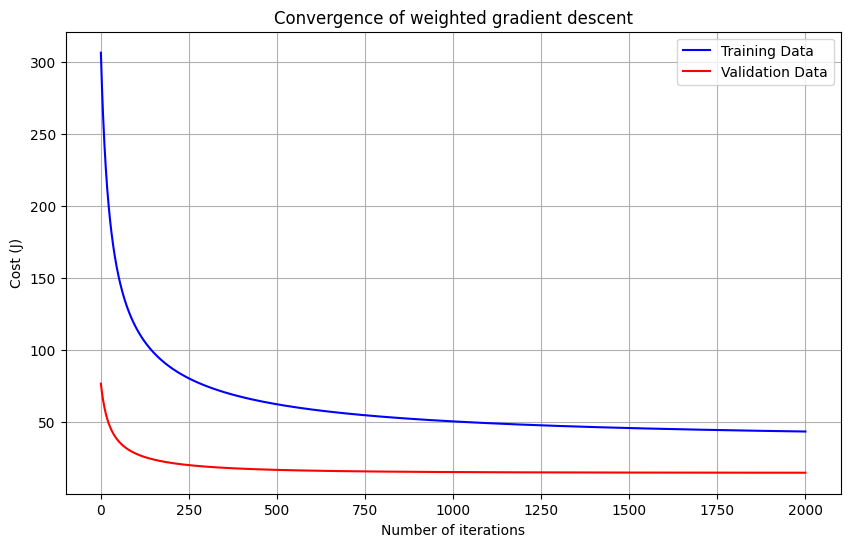

In [141]:
# Plot cost at each iteration for Cancer set
plt.plot(range(1, Iterations + 1), cost_historyT2b, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), cost_historyV2b, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of weighted gradient descent')
plt.legend()

plt.show()

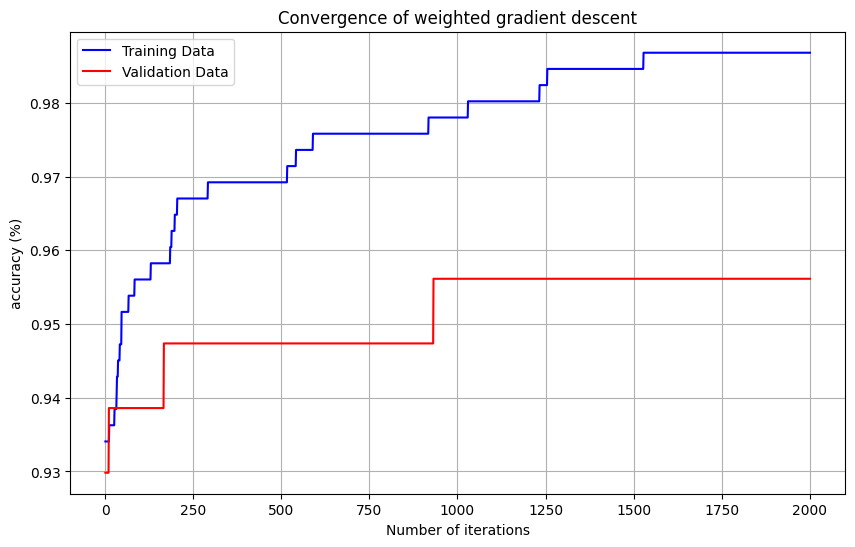

In [142]:
# Plot accuracy at each iteration for Cancer set
plt.plot(range(1, Iterations + 1), accuracy_historyT2b, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), accuracy_historyV2b, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('accuracy (%)')
plt.title('Convergence of weighted gradient descent')
plt.legend()

plt.show()

In [143]:
# Assign each predicted variable as a 1 or a 0 for the validation set
pV02b = 1/(1+np.exp(-Theta2b.dot(X_valid2a.transpose())))
pV12b = np.zeros(ValidSizeC);

# Confusion matrix for validation set
for a in range(ValidSizeC):
    if pV02b[a] > 0.5:
       pV12b[a] = 1
    else:
      pV12b[a] = 0
cnf_matrixV2b = confusion_matrix(pV12b, Y_valid2)
cnf_matrixV2b

array([[44,  0],
       [ 5, 65]])

In [144]:
# Seperate true positives, true negatives, false positives, and false negatives
tpV2b = cnf_matrixV2b[1,1]
tnV2b = cnf_matrixV2b[0,0]
fpV2b = cnf_matrixV2b[0,1]
fnV2b = cnf_matrixV2b[1,0]

In [145]:
# Calculate recal, precision and F1 score for validation set
recalV2b = tpV2b/(tpV2b+fnV2b)
precisionV2b = tpV2b/(tpV2b+fpV2b)
f1scoreV2b = (2*recalV2b*precisionV2b)/(recalV2b+precisionV2b)

print('Final Validation Accuracy =', accuracy_historyV2b[1999])
print('Final Validation Recal =', recalV2b)
print('Final Validation Precision =', precisionV2b)
print('Final Validation F1 Score =', f1scoreV2b)

Final Validation Accuracy = 0.956140350877193
Final Validation Recal = 0.9285714285714286
Final Validation Precision = 1.0
Final Validation F1 Score = 0.962962962962963


Text(0.5, 533.5555555555555, 'Predicted label')

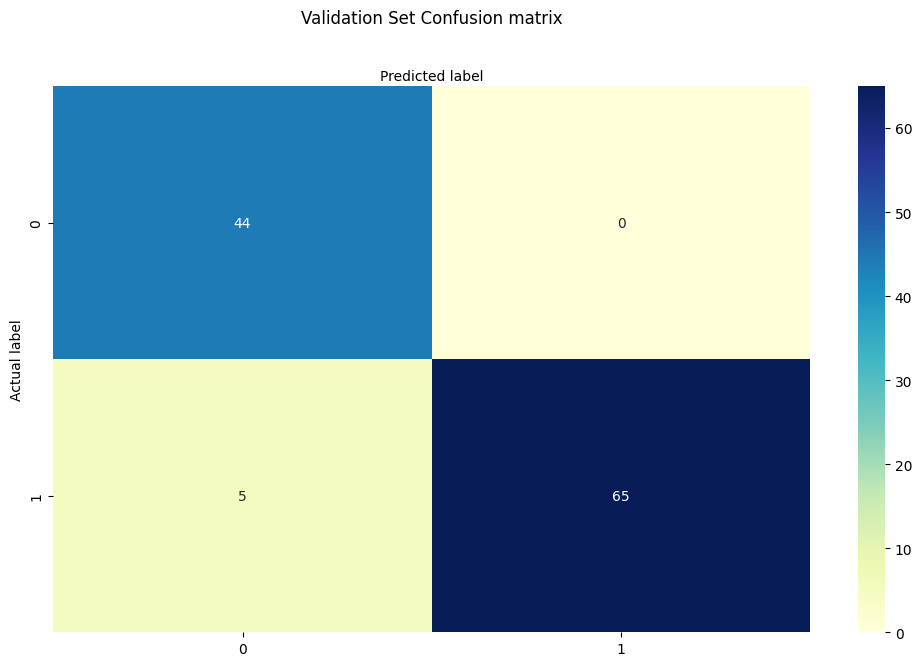

In [146]:
# Display confusion matrix for validation set
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixV2b), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Validation Set Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [147]:
# SECTION 4: Problem 3

# Perform Naive Bayes regression
gnb = GaussianNB()
Bayes3 = gnb.fit(X_train2a, Y_train2)

In [148]:
pred_Y3 = Bayes3.predict(X_valid2a)
report3 = classification_report(Y_valid2, pred_Y3)
print(report3)

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93        49
         1.0       0.92      1.00      0.96        65

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [149]:
matrix3 = confusion_matrix(Y_valid2, pred_Y3)
print(matrix3)

[[43  6]
 [ 0 65]]


Text(0.5, 533.5555555555555, 'Predicted label')

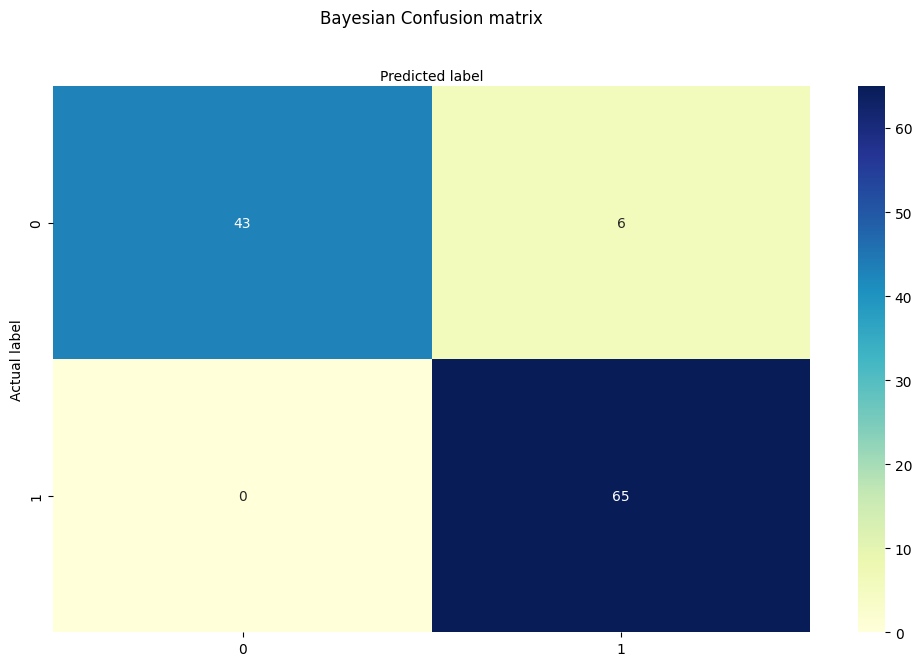

In [150]:
# Display confusion matrix for Bayesian Model
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Bayesian Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [151]:
# SECTION 5: Problem 4

# Initialize number of trainings
N = 10

In [152]:
Accuracy4 = np.zeros(N)
Recall4 = np.zeros(N)
Precision4 = np.zeros(N)
F1Score4 = np.zeros(N)

# Perform logistic regression over range N
for n in range(N-1):
  pca = PCA(n_components=(n+1))
  principalComponents4 = pca.fit_transform(X_train2a)
  validationComponents4 = pca.fit_transform(X_valid2a)
  clf = LogisticRegression()
  Model4 = clf.fit(principalComponents4, Y_train2)
  Pred4 = Model4.predict(validationComponents4)
  matrix4 = confusion_matrix(Y_valid2, Pred4)

  # Seperate true positives, true negatives, false positives, and false negatives
  tp4 = matrix4[1,1]
  tn4 = matrix4[0,0]
  fp4 = matrix4[0,1]
  fn4 = matrix4[1,0]

  # Calculate Accuracy, Recall, Precision, and F1 Score
  Accuracy4[n+1] = (tp4+tn4)/(tp4+tn4+fn4+fp4)
  Recall4[n+1] = tp4/(tp4+fn4)
  Precision4[n+1] = tp4/(tp4+fp4)
  F1Score4[n+1]= (2*Recall4[n+1]*Precision4[n+1])/(Recall4[n+1]+Precision4[n+1])

In [153]:
print('Confusion Matrix \n', matrix4)
principalDf = pd.DataFrame(data = principalComponents4, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9'])
principalDf.head()

Confusion Matrix 
 [[43  6]
 [ 2 63]]


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,-3.531021,-1.861545,1.446984,-0.183808,-0.555402,0.747796,-0.239297,-0.328262,0.545468
1,-2.006025,-0.839895,0.577940,3.109842,0.456968,-0.642875,0.649044,-0.777149,-0.020659
2,6.186979,5.759987,-0.274684,-0.872800,-0.647122,2.403073,1.149423,0.437014,0.032601
3,-2.446744,-0.522177,1.922348,0.334706,0.149647,-2.181089,-0.579503,1.383343,-1.053896
4,-2.457651,-1.082022,-1.634026,0.038976,0.555613,0.209210,-0.178024,-0.194466,-0.326191


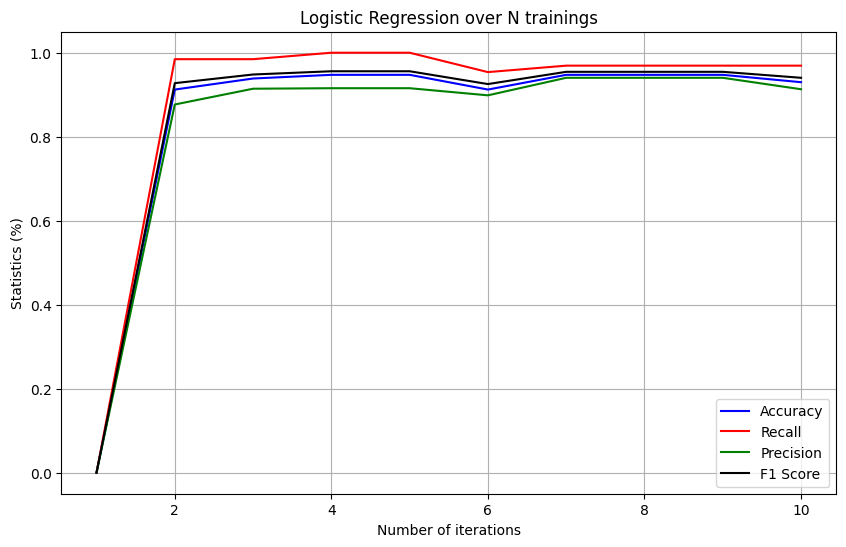

In [154]:
# Plot accuracy, Recall, Precision, F1 Score at each iteration for logistic regression
plt.plot(range(1, N+1), Accuracy4, color='blue', label='Accuracy')
plt.plot(range(1, N+1), Recall4, color='red', label='Recall')
plt.plot(range(1, N+1), Precision4, color='green', label='Precision')
plt.plot(range(1, N+1), F1Score4, color='black', label='F1 Score')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Statistics (%)')
plt.title('Logistic Regression over N trainings')
plt.legend()

plt.show()

In [155]:
# SECTION 6: Problem 5

# Initialize number of trainings
N = 31

In [156]:
Accuracy5 = np.zeros(N)
Recall5 = np.zeros(N)
Precision5 = np.zeros(N)
F1Score5 = np.zeros(N)

# Perform Bayes regression over range N
for n in range(N-1):
  pca = PCA(n_components=(n+1))
  principalComponents5 = pca.fit_transform(X_train2a)
  validationComponents5 = pca.fit_transform(X_valid2a)
  gnb = GaussianNB()
  Model5 = gnb.fit(principalComponents5, Y_train2)
  Pred5 = Model5.predict(validationComponents5)
  matrix5 = confusion_matrix(Y_valid2, Pred5)

  # Seperate true positives, true negatives, false positives, and false negatives
  tp5 = matrix5[1,1]
  tn5 = matrix5[0,0]
  fp5 = matrix5[0,1]
  fn5 = matrix5[1,0]

  # Calculate Accuracy, Recall, Precision, and F1 Score
  Accuracy5[n+1] = (tp5+tn5)/(tp5+tn5+fn5+fp5)
  Recall5[n+1] = tp5/(tp5+fn5)
  Precision5[n+1] = tp5/(tp5+fp5)
  F1Score5[n+1]= (2*Recall5[n+1]*Precision5[n+1])/(Recall5[n+1]+Precision5[n+1])

In [157]:
print('Confusion Matrix \n', matrix5)

Confusion Matrix 
 [[31 18]
 [ 2 63]]


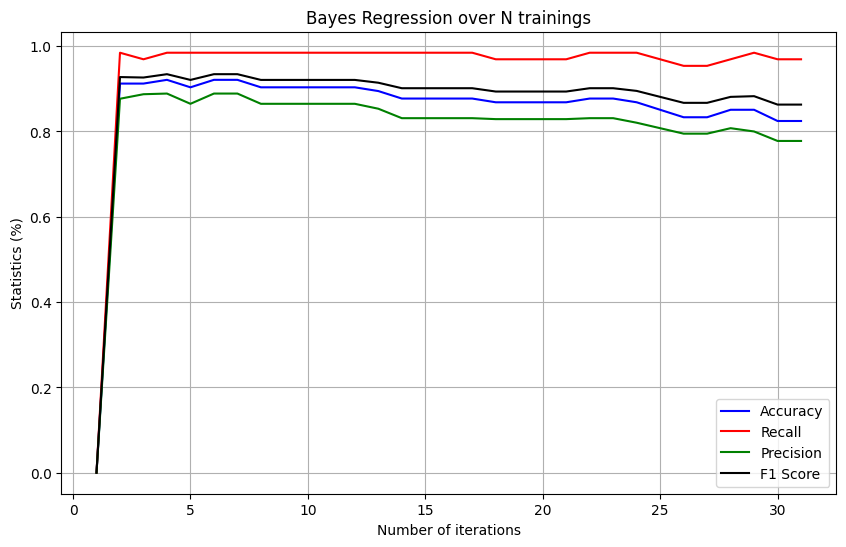

In [158]:
# Plot accuracy, Recall, Precision, F1 Score at each iteration for Bayes regulation
plt.plot(range(1, N+1), Accuracy5, color='blue', label='Accuracy')
plt.plot(range(1, N+1), Recall5, color='red', label='Recall')
plt.plot(range(1, N+1), Precision5, color='green', label='Precision')
plt.plot(range(1, N+1), F1Score5, color='black', label='F1 Score')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Statistics (%)')
plt.title('Bayes Regression over N trainings')
plt.legend()

plt.show()